In [8]:
import numpy as np
from matplotlib import pyplot as plt

**Rule**
- Open book, google, wolfram alpha etc.
- No communication regarding exam to anyone except me.
- You will be graded out of 144. Not 160.
- Make sure you notebook runs.

# Part 1 Easy Stuff -- Stright from Exercise (20 points Each)

## MC Integral:
Compute
$$ \iint_C (x-1)(y-2)(z-3) \; dV $$ 
where $C$ is a **sphere** of radius 1 center around (0,0,0)

In [9]:
def gen_point():
    return np.random.random()*2 - 1, np.random.random()*2 - 1, np.random.random()*2 - 1

def f(x, y, z):
    return (x-1) * (y-2) * (z-3)

def g(x, y, z):
    if x**2 + y**2 + z**2 < 1: #inside a sphere of radius 1
        return f(x,y,z)
    else: 
        return 0

s = 0
m = 100000
for i in range(m):
    x, y, z = gen_point()
    s += g(x, y, z)
print(s/m*8)

-25.177672880325332


## Find the location of the minimum of the following function

$$
f(x,y,z) = (x-1y)^2 + (x-3z)^2 + (x-1)^2 + 2(y-2)^2 + 3(z-3)^2
$$


In [57]:
def f(v):
    x,y,z = v
    return ((x - (2*y))**2) + ((x-(3*z))**2) + ((x-1)**2) + (2*(y-2)**2) + (3*(z-3)**2)



def partial_i(f, v, i, h=0.001):
    v_p = v.copy()
    v_p[i] += h
    v_m = v.copy()
    v_m[i] -= h
    return (f(v_p) - f(v_m))/(2*h)


def grad(f, v, h=0.0001):
    p = []
    for i in range(len(v)):
        p.append(partial_i(f, v, i, h))
    return np.array(p)

def ttt(f, x0, lmb, n):
    x = x0.copy()
    xs = [x.copy()]
    xs = [x.copy() for i in range(n)]
    for i in range(n):
        x = x - lmb*grad(f, x)
        xs.append(x.copy())
    return x, xs

x, xs = ttt(f, np.array([0., 0., 0.]), 0.001, 10000)
print(x)

[2.89473684 1.63157895 1.47368421]


## Estimate the following number

Consider a stack of cards with number from 1-99 (inclusive) on it. There is only one of each.

What is the probability that when we draw 2 cards at the **same time** and the larger card is strictly more than 2 times the smaller card.

Hint: Drawing at the **same time** guarantees you will never get the same number.


In [58]:
def card():
    x = np.random.randint(1,100,2)
    if (x[0] > 2*(x[1]) or x[1] > 2*(x[0])):
        return 1
    return 0

ans = 0
bound = 100000
for i in range(bound):
    ans += card()
final_ans = ans/bound
print(final_ans)

0.48949


## Solve the following System of Equations
One solution is enough.

$$
x + y + z = 6.6\\
x^2 + 2 y^2 + 3z^2 = 43.56\\
xyz = 7.986
$$

Hint: there is an answer around x=1, y=2, z=3

In [45]:
def a(x, y, z):
    return x + y + z - 6.6
def b(x, y, z):
    return x**2 + 2*y**2 + 3*z**2 - 43.56
def c(x, y, z):
    return x*y*z - 7.986


def run(x0, y0, z0, n):
    x, y, z = x0, y0, z0
    for i in range(n):
        d = np.array([-a(x,y,z), -b(x,y,z), -c(x,y,z)])
        TT = test(x,y,z)
        dx, dy, dz = np.linalg.solve(TT, d)
        x = x+dx
        y = y+dy
        z = z+dz
    return x,y,z


def test(x, y, z):
    return np.array([
        [1,1,1],
        [2*x,4*y,6*z],
        [y*z,x*z,x*y],
    ])

x, y, z = run(1, 2, 3, 100)

print("x:", x)
print("y:", y)
print("z:", z)

x: 1.1000000000000012
y: 2.199999999999996
z: 3.300000000000002


## Equal Partitioning

AJ bought 25 pieces of cake for 5 students. The problem is that each piece of cake weigh differently. The weight of the cake is given in the array below. AJ wants to be fair by
- Give 5 cake to each student
- Make sure everyone get about the same amount of cake. Yes, it's a loose definition. Anything sensible is fine.

**Your Task**

Give the list indices of cake that you give to each student.

Bonus:(0 point) Solve this exactly with linear optimization.

In [46]:
np.random.seed(9983)
cake_weights = np.random.random(25)
print(cake_weights)

[0.65882887 0.06027274 0.37937644 0.06747164 0.65809827 0.03881445
 0.07219876 0.38016139 0.05596416 0.80919586 0.78206881 0.41166766
 0.06511818 0.60047652 0.66955029 0.53140532 0.57318565 0.66038214
 0.98447152 0.44450527 0.35804503 0.48759695 0.88029813 0.41067726
 0.46043122]


In [56]:
cake_weights2 = cake_weights.reshape(5, 5)

def solve(ttt):
    new_ans = ttt.copy()
    a = np.random.randint(5)
    b = np.random.randint(5)
    cc = np.random.randint(5)
    dd = np.random.randint(5)
    new_ans[a][dd] = ttt[b][cc]
    new_ans[b][cc] = ttt[a][dd]
    return new_ans

def manage(lst):
    sum_lst = []
    for i in range(5):
        sum_lst.append(sum(lst[i]))
    return max(sum_lst) - min(sum_lst)

def search():
    ttt = cake_weights2
    for i in range(300000):
        ss = solve(ttt)
        if manage(ss) < manage(ttt):
            ttt = ss
    return ttt, manage(ttt)

ttt, manage_ans = search()

cake_weights3= cake_weights.tolist()
ans_lst = ttt.tolist()
final = []
for i in range(5):
    fff = []
    for j in range(5):
        fff.append(cake_weights3.index(ans_lst[i][j]))
    final.append(fff)
final

[[2, 5, 23, 22, 13],
 [10, 6, 16, 1, 9],
 [17, 15, 4, 12, 7],
 [19, 20, 8, 18, 24],
 [11, 21, 3, 14, 0]]

In [55]:
for i in range(5):
    print(sum(ttt[i]))

2.3049619884773893
2.3053190579003244
2.296346256586605
2.30433345646962
2.2893017979825077


# Part 2 Creative Stuff.

## Hotel Match Making (30)

Suppose we are hotel & customer match making. Our goal is to get the most revenue.

The willingness to pay from customer i for hotel h is given in the matrix below. Each hotel can take at most 1 customer. Each customer can stay at at most 1 hotel. Since there are more hotel than customer, some hotel will get no customer.

Find the pairing that gives the decently large revenue. Print the total revenue.

[[0.55735327 0.54176063 0.56042378 ... 0.71051848 0.36982951 0.21609707]
 [0.18197081 0.45514201 0.18835709 ... 0.14630865 0.59352533 0.62928746]
 [0.64829536 0.79965896 0.01992678 ... 0.81419532 0.6406979  0.60421524]
 ...
 [0.17491955 0.30214069 0.2077847  ... 0.51726602 0.39850227 0.1229079 ]
 [0.50690593 0.70547192 0.64041367 ... 0.5426051  0.08598152 0.88225394]
 [0.25473725 0.64751742 0.64354727 ... 0.28929743 0.97052076 0.86258568]]


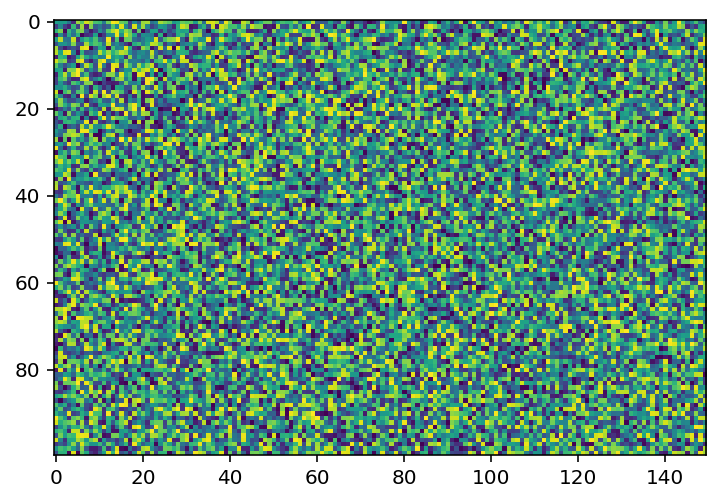

In [7]:
n_cust = 100
n_hotel = 150
np.random.seed(5555)
pay = np.random.rand(n_cust, n_hotel)
plt.imshow(pay)

## Random Walk (30)

Random walk process is a very versatile simulation tool. You did a version of it during class when we did the stock. We are going to consider a simpler one here where your position of you next step is the current position +-1 depending on result of a **fair** coin toss. Specifically

$$
    x_{n+1} = x_{n} + step
$$

where
$$
    step = \begin{cases}
    +1 \quad \text{if coin is head}\\
    -1 \quad \text{if coin is tail}
    \end{cases}
$$

Orginally it starts at $x_0=0$, answer the following question.

Consider random walk for 100 times. (this means the maximum you can end up is +100 or -100)

### At the end
Find the probability that you will **end** up at $x_{100}\ge 10$

### Over at at any time
Find the probability that you will go over(or equal) 10 at anytime.

### Over and Back
Find the probability that you will reach x=+5 and comeback and reach x=0.

### Mean of Max
What is the mean of the furthest distance it will ever reached? (max(abs(xn))